In [2]:
#IMPORT THE LIBRARIES
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
import IPython.display as ipd
from IPython.display import Audio
import keras
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM, BatchNormalization, GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import tensorflow as tf 
print("Done")


Done


In [4]:
#preparing data set

ravdess = r"C:\Users\RGUKT\Documents\Jupyter Notebook\Ravdess\audio_speech_actors_01-24"
ravdess_directory_list = os.listdir(ravdess)
print(ravdess_directory_list)

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


In [6]:
Crema = r"C:\Users\RGUKT\Documents\Jupyter Notebook\Crema"
Tess = r"C:\Users\RGUKT\Documents\Jupyter Notebook\Tess"
Savee = r"C:\Users\RGUKT\Documents\Jupyter Notebook\Savee"

In [8]:
file_emotion = []
file_path = []
for i in ravdess_directory_list:
    # Correctly join the directory path
    actor_directory = os.path.join(ravdess, i)
    
    # Check if it's a directory before listing its contents
    if os.path.isdir(actor_directory):
        actor_files = os.listdir(actor_directory)
        
        for f in actor_files:
            part = f.split('.')[0].split('-')
            # third part in each file represents the emotion associated to that file.
            file_emotion.append(int(part[2]))
            file_path.append(os.path.join(actor_directory, f))

In [10]:
print(actor_directory[0])
print(part[0])
print(file_path[0])
print(int(part[2]))
print(f)

C
03
C:\Users\RGUKT\Documents\Jupyter Notebook\Ravdess\audio_speech_actors_01-24\Actor_01\03-01-01-01-01-01-01.wav
8
03-01-08-02-02-02-24.wav


In [12]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
ravdess_df = pd.concat([emotion_df, path_df], axis=1)
# changing integers to actual emotions.
ravdess_df.Emotions.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust',
                             8:'surprise'},
                            inplace=True)
print(ravdess_df.head())
print("______________________________________________")
print(ravdess_df.tail())
print("_______________________________________________")
print(ravdess_df.Emotions.value_counts())




  Emotions                                               Path
0  neutral  C:\Users\RGUKT\Documents\Jupyter Notebook\Ravd...
1  neutral  C:\Users\RGUKT\Documents\Jupyter Notebook\Ravd...
2  neutral  C:\Users\RGUKT\Documents\Jupyter Notebook\Ravd...
3  neutral  C:\Users\RGUKT\Documents\Jupyter Notebook\Ravd...
4  neutral  C:\Users\RGUKT\Documents\Jupyter Notebook\Ravd...
______________________________________________
      Emotions                                               Path
1435  surprise  C:\Users\RGUKT\Documents\Jupyter Notebook\Ravd...
1436  surprise  C:\Users\RGUKT\Documents\Jupyter Notebook\Ravd...
1437  surprise  C:\Users\RGUKT\Documents\Jupyter Notebook\Ravd...
1438  surprise  C:\Users\RGUKT\Documents\Jupyter Notebook\Ravd...
1439  surprise  C:\Users\RGUKT\Documents\Jupyter Notebook\Ravd...
_______________________________________________
Emotions
neutral     288
happy       192
sad         192
angry       192
fear        192
disgust     192
surprise    192
Name: count, dty

In [14]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # Correctly constructing file paths
    file_path.append(os.path.join(Crema, file))
    
    # Extracting emotions based on the file name
    part = file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()
print(Crema_df.Emotions.value_counts())

Emotions
angry      1271
disgust    1271
fear       1271
happy      1271
sad        1271
neutral    1087
Name: count, dtype: int64


In [16]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    # Correct the path concatenation
    dir_path = os.path.join(Tess, dir)
    
    # Check if it's a directory
    if os.path.isdir(dir_path):
        directories = os.listdir(dir_path)
        
        for file in directories:
            part = file.split('.')[0]
            part = part.split('_')[2]  # Extract emotion part from the file name
            if part == 'ps':
                file_emotion.append('surprise')
            else:
                file_emotion.append(part)
            
            # Correctly join the directory and file path
            file_path.append(os.path.join(dir_path, file))

        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()
print(Tess_df.Emotions.value_counts())

Emotions
angry       400
disgust     400
fear        400
happy       400
neutral     400
surprise    400
sad         400
Name: count, dtype: int64


In [18]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    # Correctly join the directory and file path
    full_file_path = os.path.join(Savee, file)
    file_path.append(full_file_path)
    
    # Extract emotion code and map to emotion
    part = file.split('_')[1]
    ele = part[:-6]
    if ele == 'a':
        file_emotion.append('angry')
    elif ele == 'd':
        file_emotion.append('disgust')
    elif ele == 'f':
        file_emotion.append('fear')
    elif ele == 'h':
        file_emotion.append('happy')
    elif ele == 'n':
        file_emotion.append('neutral')
    elif ele == 'sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()
print(Savee_df.Emotions.value_counts())

Emotions
neutral     120
angry        60
disgust      60
fear         60
happy        60
sad          60
surprise     60
Name: count, dtype: int64


In [20]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head(100)

,Emotions,Path
0,neutral,C:\Users\RGUKT\Documents\Jupyter Notebook\Ravd...
1,neutral,C:\Users\RGUKT\Documents\Jupyter Notebook\Ravd...
2,neutral,C:\Users\RGUKT\Documents\Jupyter Notebook\Ravd...
3,neutral,C:\Users\RGUKT\Documents\Jupyter Notebook\Ravd...
4,neutral,C:\Users\RGUKT\Documents\Jupyter Notebook\Ravd...
...,...,...
95,angry,C:\Users\RGUKT\Documents\Jupyter Notebook\Ravd...
96,fear,C:\Users\RGUKT\Documents\Jupyter Notebook\Ravd...
97,fear,C:\Users\RGUKT\Documents\Jupyter Notebook\Ravd...
98,fear,C:\Users\RGUKT\Documents\Jupyter Notebook\Ravd...


In [22]:
print(data_path.Emotions.value_counts())

Emotions
happy       1923
sad         1923
angry       1923
fear        1923
disgust     1923
neutral     1895
surprise     652
Name: count, dtype: int64


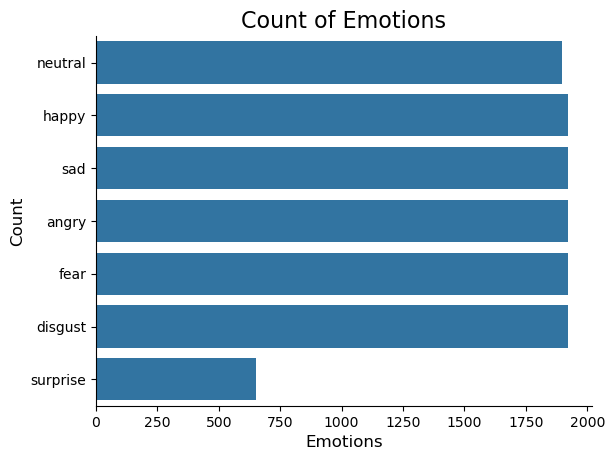

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [26]:
data,sr = librosa.load(file_path[0])
sr

22050

In [28]:
ipd.Audio(data,rate=sr)

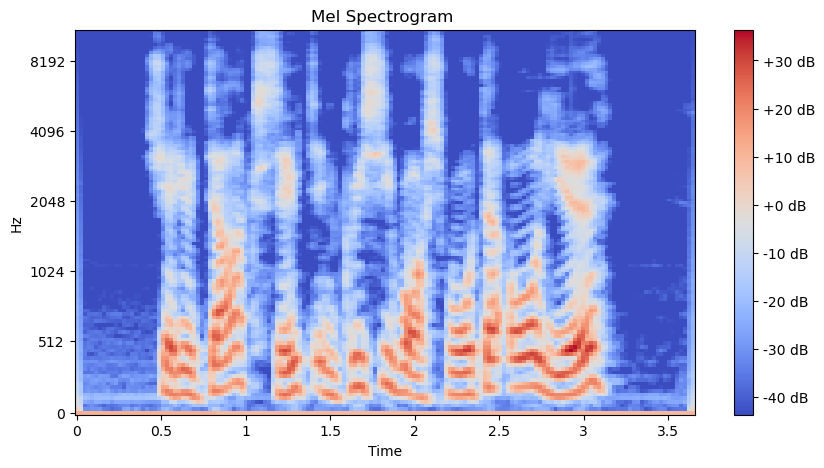

In [30]:
# CREATE LOG MEL SPECTROGRAM
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
log_spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, y_axis='mel', sr=sr, x_axis='time');
plt.title('Mel Spectrogram ')
plt.colorbar(format='%+2.0f dB')

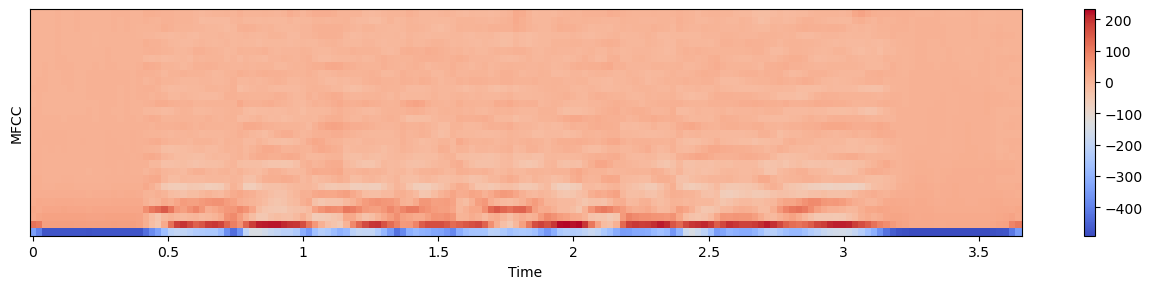

In [32]:
mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=30)


# MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(data,rate=sr)

In [34]:
# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

# STRETCH
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

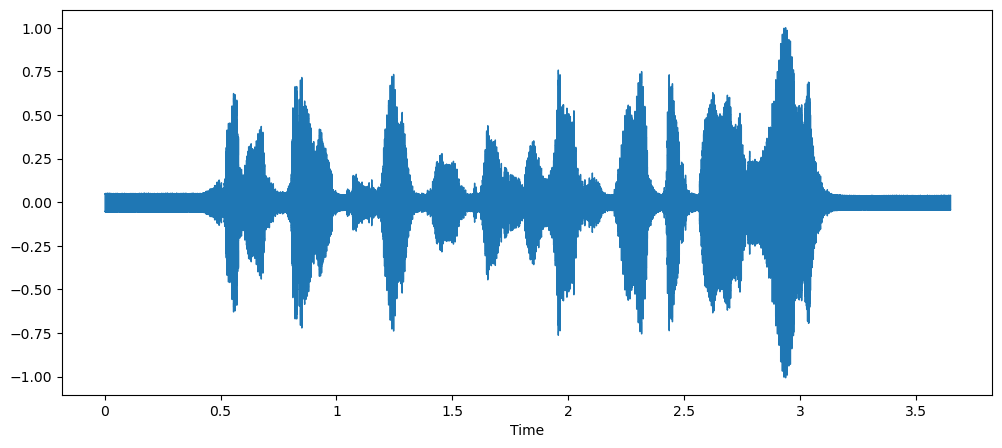

In [36]:
# NORMAL AUDIO


import librosa.display
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sr)
ipd.Audio(data,rate=sr)

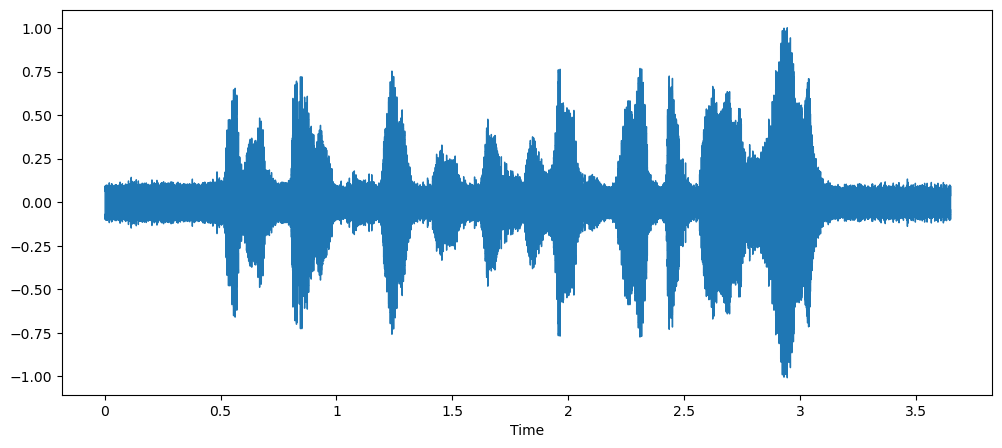

In [38]:
# AUDIO WITH NOISE
x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

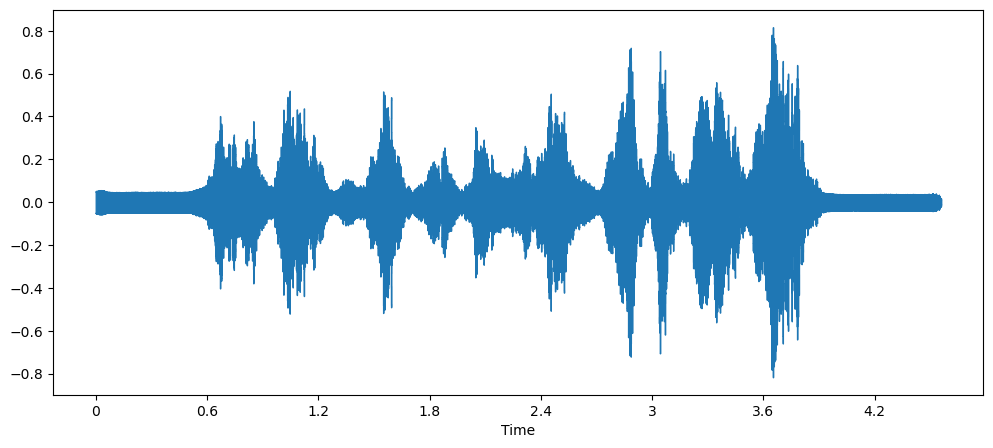

In [40]:
# STRETCHED AUDIO
x = stretch(data)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

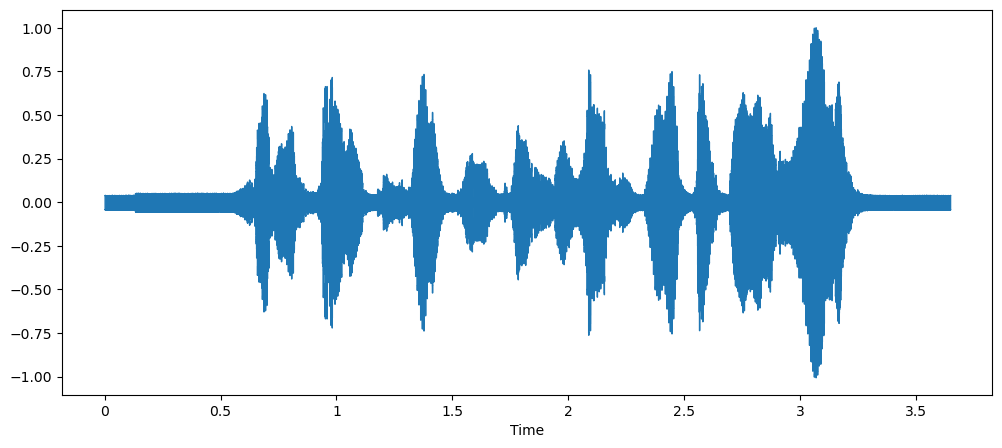

In [42]:
# SHIFTED AUDIO
x = shift(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

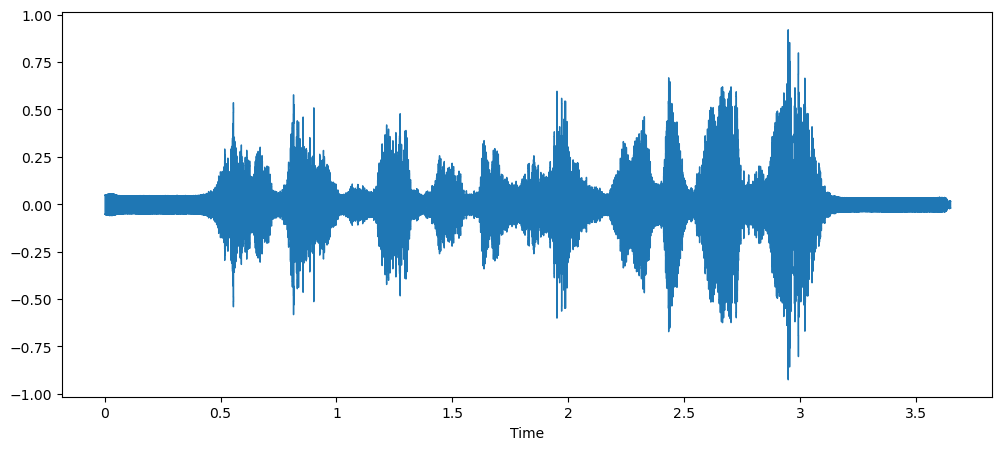

In [44]:
x = pitch(data, sr, pitch_factor=2)  # Shift pitch by 2 semitones
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

In [46]:
# Functions to extract different audio features
def zcr(data, frame_length, hop_length):
    zcr = librosa.feature.zero_crossing_rate(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(zcr)
    
def rmse(data, frame_length=2048, hop_length=512):
    rmse = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse)

def mfcc(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
    mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=13, hop_length=hop_length)
    return np.squeeze(mfcc.T) if not flatten else np.ravel(mfcc.T)

# Feature extraction pipeline
def extract_features(data, sr=22050, frame_length=2048, hop_length=512):
    result = np.array([])

    # Stack multiple feature types together
    result = np.hstack((
        zcr(data, frame_length, hop_length),
        rmse(data, frame_length, hop_length),
        mfcc(data, sr, frame_length, hop_length)
    ))
    return result

# Data augmentation pipeline and feature extraction
def get_features(path, duration=2.5, offset=0.6):
    data, sr = librosa.load(path, duration=duration, offset=offset)
    
    # Original features
    audio_features = extract_features(data, sr)
    audio = np.array(audio_features)
    
    # Apply noise augmentation
    noised_audio = noise(data)
    audio_noised = extract_features(noised_audio, sr)
    audio = np.vstack((audio, audio_noised))
    
    # Apply pitch shifting
    pitched_audio = pitch(data, sr)
    audio_pitched = extract_features(pitched_audio, sr)
    audio = np.vstack((audio, audio_pitched))
    
    # Combined pitch shifting + noise
    pitched_noised_audio = noise(pitch(data, sr))
    audio_pitched_noised = extract_features(pitched_noised_audio, sr)
    audio = np.vstack((audio, audio_pitched_noised))
    
    return audio


In [48]:
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

Number of processors:  12


In [50]:
import timeit  # Import timeit for timing the process
from tqdm import tqdm  # Import tqdm for the progress bar

# Timing and batch processing
start = timeit.default_timer()
X, Y = [], []

# Iterating through all paths and emotions
for path, emotion, index in tqdm(zip(data_path.Path, data_path.Emotions, range(data_path.Path.shape[0]))):
    features = get_features(path)
    if index % 500 == 0:
        print(f'{index} audio files have been processed')
    
    # Append features and corresponding emotion label
    for feature_set in features:
        X.append(feature_set)
        Y.append(emotion)

print('Done processing audio files.')
stop = timeit.default_timer()

# Print the total time taken
print('Time: ', stop - start)

1it [00:00,  1.18it/s]

0 audio files have been processed


502it [00:52,  9.91it/s]

500 audio files have been processed


1003it [01:41, 10.81it/s]

1000 audio files have been processed


1503it [02:28, 13.61it/s]

1500 audio files have been processed


2003it [03:11, 10.34it/s]

2000 audio files have been processed


2503it [03:54, 11.86it/s]

2500 audio files have been processed


3003it [04:33, 11.76it/s]

3000 audio files have been processed


3503it [05:15, 12.90it/s]

3500 audio files have been processed


4003it [05:55, 12.20it/s]

4000 audio files have been processed


4503it [06:35, 11.44it/s]

4500 audio files have been processed


5003it [07:15, 11.62it/s]

5000 audio files have been processed


5503it [07:56, 11.12it/s]

5500 audio files have been processed


6003it [08:34, 12.76it/s]

6000 audio files have been processed


6503it [09:13, 13.64it/s]

6500 audio files have been processed


7002it [09:53, 13.02it/s]

7000 audio files have been processed


7502it [10:33, 13.70it/s]

7500 audio files have been processed


8002it [11:14, 13.13it/s]

8000 audio files have been processed


8502it [11:55, 13.29it/s]

8500 audio files have been processed


9003it [12:33, 17.62it/s]

9000 audio files have been processed


9503it [13:07, 15.69it/s]

9500 audio files have been processed


10003it [13:43, 14.28it/s]

10000 audio files have been processed


10503it [14:22, 11.67it/s]

10500 audio files have been processed


11003it [14:58, 15.61it/s]

11000 audio files have been processed


11502it [15:32, 13.76it/s]

11500 audio files have been processed


12003it [16:17, 10.50it/s]

12000 audio files have been processed


12162it [16:32, 12.26it/s]

Done processing audio files.
Time:  992.3991482000001


In [52]:
len(X), len(Y), data_path.Path.shape

(48648, 48648, (12162,))

In [54]:
Emotions = pd.DataFrame(X)
Emotions['Emotions'] = Y
Emotions.to_csv('emotion.csv', index=False)
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,1611,1612,1613,1614,1615,1616,1617,1618,1619,Emotions
0,0.173828,0.264648,0.372559,0.486328,0.625488,0.681152,0.720703,0.651855,0.562988,0.559082,...,0.816714,0.812341,0.807019,0.800742,0.793534,0.785372,0.776301,0.766315,0.755441,neutral
1,0.251953,0.373047,0.496094,0.487793,0.485352,0.480469,0.483887,0.481934,0.490234,0.505859,...,-2.925130,-3.341641,-2.875650,-0.498882,3.465348,2.945250,-2.030456,-7.221222,-4.602076,neutral
2,0.256348,0.354492,0.471191,0.414062,0.378418,0.373535,0.354492,0.408691,0.466797,0.522461,...,0.007222,0.007180,0.007128,0.007062,0.006994,0.006906,0.006816,0.006713,0.006601,neutral
3,0.228027,0.350586,0.481445,0.494629,0.510742,0.519043,0.511719,0.508301,0.513672,0.504395,...,-1.833539,-2.128749,-6.617835,-3.028490,0.017414,2.115997,-0.332547,-0.213835,1.690247,neutral
4,0.247070,0.389648,0.564941,0.642578,0.665527,0.684570,0.676270,0.666992,0.648926,0.595703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,neutral


In [56]:
Emotions = pd.read_csv('./emotion.csv')
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,1611,1612,1613,1614,1615,1616,1617,1618,1619,Emotions
0,0.173828,0.264648,0.372559,0.486328,0.625488,0.681152,0.720703,0.651855,0.562988,0.559082,...,0.816714,0.812341,0.807019,0.800742,0.793534,0.785372,0.776301,0.766315,0.755441,neutral
1,0.251953,0.373047,0.496094,0.487793,0.485352,0.480469,0.483887,0.481934,0.490234,0.505859,...,-2.925130,-3.341641,-2.875650,-0.498882,3.465348,2.945250,-2.030456,-7.221222,-4.602076,neutral
2,0.256348,0.354492,0.471191,0.414062,0.378418,0.373535,0.354492,0.408691,0.466797,0.522461,...,0.007222,0.007180,0.007128,0.007062,0.006994,0.006906,0.006816,0.006713,0.006601,neutral
3,0.228027,0.350586,0.481445,0.494629,0.510742,0.519043,0.511719,0.508301,0.513672,0.504395,...,-1.833539,-2.128749,-6.617835,-3.028490,0.017414,2.115997,-0.332547,-0.213835,1.690247,neutral
4,0.247070,0.389648,0.564941,0.642578,0.665527,0.684570,0.676270,0.666992,0.648926,0.595703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,neutral


In [58]:
print(Emotions.isna().any())

0           False
1           False
2           False
3           False
4           False
            ...  
1616         True
1617         True
1618         True
1619         True
Emotions    False
Length: 1621, dtype: bool


In [88]:
Emotions=Emotions.fillna(0)
print(Emotions.isna().any())
Emotions.shape

0           False
1           False
2           False
3           False
4           False
            ...  
1616        False
1617        False
1618        False
1619        False
Emotions    False
Length: 1621, dtype: bool


(48648, 1621)

In [90]:
np.sum(Emotions.isna())

0           0
1           0
2           0
3           0
4           0
           ..
1616        0
1617        0
1618        0
1619        0
Emotions    0
Length: 1621, dtype: int64

In [92]:
#taking all rows and all cols without last col for X which include features
#taking last col for Y, which include the emotions


X = Emotions.iloc[: ,:-1].values
Y = Emotions['Emotions'].values

In [94]:
# As this is a multiclass classification problem onehotencoding our Y
from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [96]:


print(Y.shape)
X.shape



(48648, 7)


(48648, 1620)

In [98]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42,test_size=0.2, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((38918, 1620), (38918, 7), (9730, 1620), (9730, 7))

In [100]:
#reshape for lstm
X_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)

In [102]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((38918, 1620), (38918, 7), (9730, 1620), (9730, 7))

In [104]:
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM, BatchNormalization, GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD


In [106]:


from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
model_checkpoint = ModelCheckpoint('best_model1_weights.keras', monitor='val_accuracy', save_best_only=True)


In [108]:
early_stop=EarlyStopping(monitor='val_acc',mode='max',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.001)

In [110]:
#Reshape for CNN_LSTM MODEL

x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape
#x_testcnn[0]

((38918, 1620, 1), (38918, 7), (9730, 1620, 1), (9730, 7))

In [114]:
import tensorflow.keras.layers as L

model = tf.keras.Sequential([
    L.Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(X_train.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    
    L.Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the second max pooling layer
    
    L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    
    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fourth max pooling layer
    
    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fifth max pooling layer
    
    L.Flatten(),
    L.Dense(512,activation='relu'),
    L.BatchNormalization(),
    L.Dense(7,activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_5 (Conv1D)                    │ (None, 1620, 512)           │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 1620, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_5 (MaxPooling1D)       │ (None, 810, 512)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_6 (Conv1D)                    │ (None, 810, 512)            │       1,311,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 810, 512)            │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_6 (MaxPooling1D)       │ (None, 405, 512)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 405, 512)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (None, 405, 256)            │         655,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 405, 256)            │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_7 (MaxPooling1D)       │ (None, 203, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_8 (Conv1D)                    │ (None, 203, 256)            │         196,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 203, 256)            │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_8 (MaxPooling1D)       │ (None, 102, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 102, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_9 (Conv1D)                    │ (None, 102, 128)            │          98,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 102, 128)            │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_9 (MaxPooling1D)       │ (None, 51, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 51, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6528)                │              

 Total params: 5,620,359 (21.44 MB)

 Trainable params: 5,616,007 (21.42 MB)

 Non-trainable params: 4,352 (17.00 KB)

In [116]:
history=model.fit(x_traincnn, y_train, epochs=10, validation_data=(x_testcnn, y_test), batch_size=64,callbacks=[early_stop,lr_reduction,model_checkpoint])

Epoch 1/10
609/609 ━━━━━━━━━━━━━━━━━━━━ 2163s 4s/step - accuracy: 0.3830 - loss: 1.6666 - val_accuracy: 0.3811 - val_loss: 1.5912 - learning_rate: 0.0010
Epoch 2/10
609/609 ━━━━━━━━━━━━━━━━━━━━ 2149s 4s/step - accuracy: 0.5163 - loss: 1.2406 - val_accuracy: 0.5203 - val_loss: 1.2233 - learning_rate: 0.0010
Epoch 3/10
609/609 ━━━━━━━━━━━━━━━━━━━━ 2149s 4s/step - accuracy: 0.5618 - loss: 1.1200 - val_accuracy: 0.5603 - val_loss: 1.1331 - learning_rate: 0.0010
Epoch 4/10
609/609 ━━━━━━━━━━━━━━━━━━━━ 2156s 4s/step - accuracy: 0.6016 - loss: 1.0284 - val_accuracy: 0.4309 - val_loss: 1.8425 - learning_rate: 0.0010
Epoch 5/10
609/609 ━━━━━━━━━━━━━━━━━━━━ 2157s 4s/step - accuracy: 0.6102 - loss: 1.0148 - val_accuracy: 0.5606 - val_loss: 1.1656 - learning_rate: 0.0010
Epoch 6/10
609/609 ━━━━━━━━━━━━━━━━━━━━ 2157s 4s/step - accuracy: 0.6719 - loss: 0.8571 - val_accuracy: 0.5408 - val_loss: 1.2488 - learning_rate: 0.0010
Epoch 7/10
609/609 ━━━━━━━━━━━━━━━━━━━━ 2160s 4s/step - accuracy: 0.6674 - l

305/305 ━━━━━━━━━━━━━━━━━━━━ 120s 393ms/step - accuracy: 0.7362 - loss: 0.7459
Accuracy of our model on test data :  73.58684539794922 %


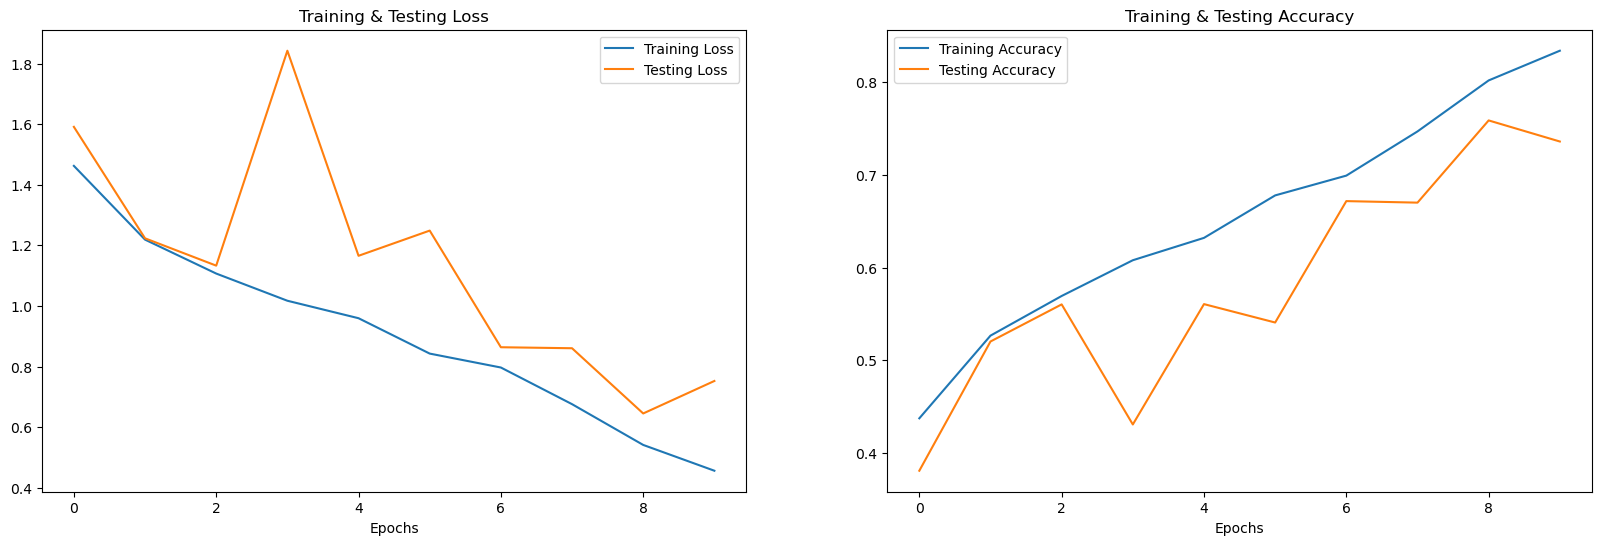

In [118]:
print("Accuracy of our model on test data : " , model.evaluate(x_testcnn,y_test)[1]*100 , "%")

epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [120]:
# predicting on test data.
pred_test0 = model.predict(x_testcnn)
y_pred0 = encoder.inverse_transform(pred_test0)
y_test0 = encoder.inverse_transform(y_test)

# Check for random predictions
df0 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df0['Predicted Labels'] = y_pred0.flatten()
df0['Actual Labels'] = y_test0.flatten()

df0.head(10)

305/305 ━━━━━━━━━━━━━━━━━━━━ 118s 386ms/step


,Predicted Labels,Actual Labels
0,neutral,neutral
1,disgust,disgust
2,fear,fear
3,angry,angry
4,fear,fear
5,angry,angry
6,angry,angry
7,sad,fear
8,angry,angry
9,happy,fear


In [122]:
df0

,Predicted Labels,Actual Labels
0,neutral,neutral
1,disgust,disgust
2,fear,fear
3,angry,angry
4,fear,fear
...,...,...
9725,angry,angry
9726,sad,sad
9727,neutral,neutral
9728,sad,sad


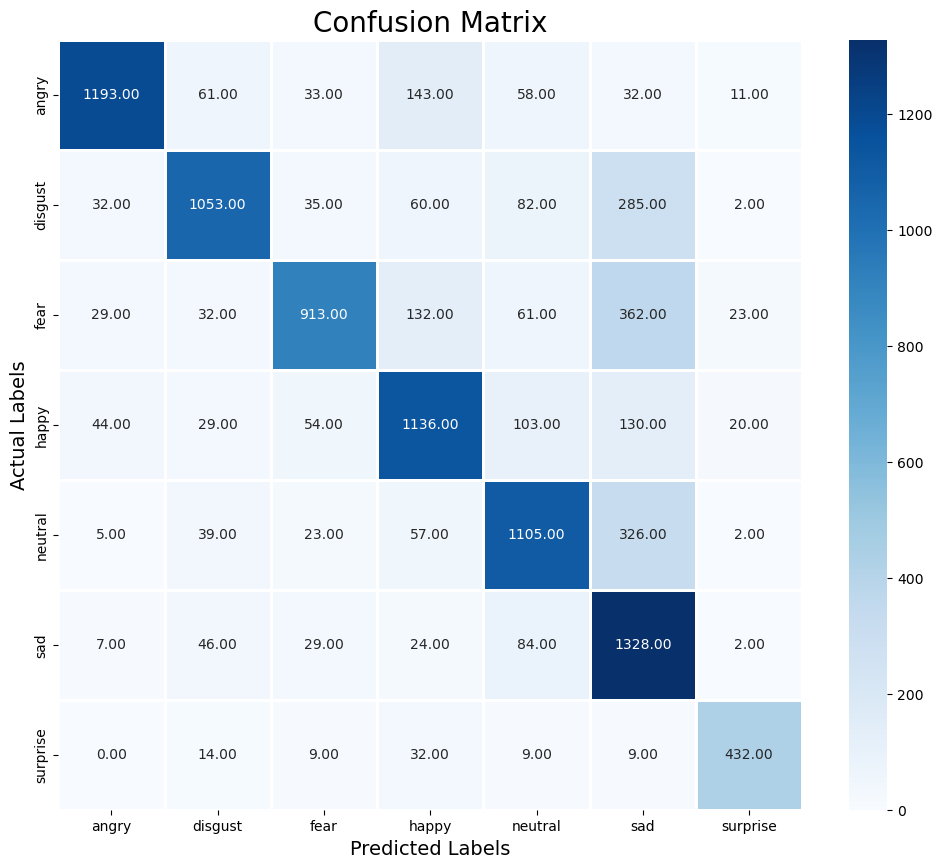

              precision    recall  f1-score   support

       angry       0.91      0.78      0.84      1531
     disgust       0.83      0.68      0.75      1549
        fear       0.83      0.59      0.69      1552
       happy       0.72      0.75      0.73      1516
     neutral       0.74      0.71      0.72      1557
         sad       0.54      0.87      0.67      1520
    surprise       0.88      0.86      0.87       505

    accuracy                           0.74      9730
   macro avg       0.78      0.75      0.75      9730
weighted avg       0.77      0.74      0.74      9730



In [124]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test0, y_pred0)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.2f')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test0, y_pred0))

In [128]:
# MLP for Pima Indians Dataset Serialize to JSON and HDF5
from tensorflow.keras.models import Sequential, model_from_json
model_json = model.to_json()
with open("CNN_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("CNN_model_weights.weights.h5")
print("Saved model to disk")

Saved model to disk


In [132]:
from tensorflow.keras.models import Sequential, model_from_json
json_file = open(r"C:\Users\RGUKT\Downloads\CNN_model.json", 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(r"C:\Users\RGUKT\Downloads\best_model1_weights.keras")
print("Loaded model from disk")

Loaded model from disk


In [134]:
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn,y_test)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

305/305 ━━━━━━━━━━━━━━━━━━━━ 120s 390ms/step - accuracy: 0.7619 - loss: 0.6299
compile_metrics: 75.86%


In [136]:
import pickle

# Saving scaler
with open('scaler2.pickle', 'wb') as f:
    pickle.dump(scaler, f)

# Loading scaler
with open('scaler2.pickle', 'rb') as f:
    scaler2 = pickle.load(f)

# Saving encoder
with open('encoder2.pickle', 'wb') as f:
    pickle.dump(encoder, f)

# Loading encoder
with open('encoder2.pickle', 'rb') as f:
    encoder2 = pickle.load(f)

    
print("Done")    

Done


In [140]:
from tensorflow.keras.models import Sequential, model_from_json
json_file = open(r"C:\Users\RGUKT\Downloads\CNN_model.json", 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(r"C:\Users\RGUKT\Downloads\best_model1_weights.keras")
print("Loaded model from disk")

Loaded model from disk


In [142]:
import pickle

with open(r"C:\Users\RGUKT\Downloads\scaler2.pickle", 'rb') as f:
    scaler2 = pickle.load(f)
    
with open(r"C:\Users\RGUKT\Downloads\encoder2.pickle", 'rb') as f:
    encoder2 = pickle.load(f)

    
print("Done")  

Done


In [144]:
import librosa

In [154]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data, frame_length=2048, hop_length=512):
    rmse = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse)
def mfcc(data, sr=22050, frame_length=2048, hop_length=512, flatten: bool=True):
    mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=13)  # `y` keyword for audio data
    return np.squeeze(mfcc.T) if not flatten else np.ravel(mfcc.T)

def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])
    
    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

In [156]:
def get_predict_feat(path):
    d, s_rate = librosa.load(path, duration=2.5, offset=0.6)
    res = extract_features(d)
    result = np.array(res)
    
    # Reshape according to the actual feature size (1620)
    result = np.reshape(result, newshape=(1, 1620))
    
    i_result = scaler2.transform(result)
    final_result = np.expand_dims(i_result, axis=2)
    
    return final_result




In [162]:
res=get_predict_feat(r"C:\Users\RGUKT\Documents\Jupyter Notebook\Ravdess\audio_speech_actors_01-24\Actor_01\03-01-01-01-01-01-01.wav")
print(res.shape)

(1, 1620, 1)


In [164]:
emotions1={1:'Neutral', 2:'Calm', 3:'Happy', 4:'Sad', 5:'Angry', 6:'Fear', 7:'Disgust',8:'Surprise'}
def prediction(path1):
    res=get_predict_feat(path1)
    predictions=loaded_model.predict(res)
    y_pred = encoder2.inverse_transform(predictions)
    print(y_pred[0][0]) 

In [166]:
prediction(r"C:\Users\RGUKT\Documents\Jupyter Notebook\Ravdess\audio_speech_actors_01-24\Actor_02\03-01-01-01-01-01-02.wav")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
neutral


In [168]:
prediction(r"C:\Users\RGUKT\Documents\Jupyter Notebook\Ravdess\audio_speech_actors_01-24\Actor_01\03-01-01-01-01-01-01.wav")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
neutral


In [170]:
prediction(r"C:\Users\RGUKT\Documents\Jupyter Notebook\Ravdess\audio_speech_actors_01-24\Actor_01\03-01-05-01-02-02-01.wav")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
angry


In [172]:
prediction(r"C:\Users\RGUKT\Documents\Jupyter Notebook\Ravdess\audio_speech_actors_01-24\Actor_21\03-01-04-02-02-02-21.wav")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
sad


In [174]:
prediction(r"C:\Users\RGUKT\Documents\Jupyter Notebook\Savee\DC_a01.wav")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
surprise


In [176]:
prediction(r"C:\Users\RGUKT\Documents\Jupyter Notebook\Savee\DC_a02.wav")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
angry


In [180]:
prediction(r"C:\Users\RGUKT\Documents\Jupyter Notebook\Savee\JE_f07.wav")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
fear


In [182]:
prediction(r"C:\Users\RGUKT\Documents\Jupyter Notebook\Savee\JE_su15.wav")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
surprise


In [186]:
prediction(r"C:\Users\RGUKT\Documents\Jupyter Notebook\Savee\JK_h15.wav")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
happy


In [190]:
prediction(r"C:\Users\RGUKT\Documents\Jupyter Notebook\Savee\KL_f14.wav")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
fear


In [198]:
prediction(r"C:\Users\RGUKT\Documents\Jupyter Notebook\Savee\KL_su12.wav")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
surprise
